In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import missingno as msno
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot, prediction_error

In [3]:
data = pd.read_csv('data_cleaned.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'index', 'OSEBuildingID', 'DataYear', 'BuildingType',
       'PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Latitude', 'Longitude',
       'Address', 'City', 'Age', 'HasParking', 'Clusters'],
      dtype='object')

In [5]:
#Séparation des variables en variables catégorielles et numériques

cat_var = ["PrimaryPropertyType", "SecondLargestPropertyUseType","Clusters", 'HasParking']

num_var = ["Age","PropertyGFATotal", "SecondLargestPropertyUseTypeGFA","NumberofFloors", "NumberofBuildings"]


In [6]:
#Nous avons remarqué que les variables cibles ne suivent pas une distribution adaptée, nous les passons donc en log

data["SiteEnergyUse(kBtu)_log"] = np.log(data["SiteEnergyUse(kBtu)"])
data["TotalGHGEmissions_log"] = np.log(data["TotalGHGEmissions"])

In [7]:
train_set, test_set = train_test_split(
    data, test_size=0.2, random_state=42, stratify=data["PrimaryPropertyType"])

y_train = train_set[["SiteEnergyUse(kBtu)_log"]]
y_test = test_set[["SiteEnergyUse(kBtu)_log"]]
X_train = train_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log", "TotalGHGEmissions",
                          "TotalGHGEmissions_log", "ENERGYSTARScore", "YearBuilt", "Neighborhood", "Latitude", "Longitude"], axis=1)
X_test = test_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log", "TotalGHGEmissions",
                        "TotalGHGEmissions_log", "ENERGYSTARScore", "YearBuilt", "Neighborhood", "Latitude", "Longitude"], axis=1)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, cat_var),
    ('num', num_pipe, num_var)
])

In [10]:
X_train = preprocessor.fit_transform(X_train)

In [11]:
mean_absolute_percentage_error = lambda y1, y2 : np.mean(np.abs(y1-y2)/(np.maximum(np.abs(y1), np.abs(y2)))*100)

In [12]:
def rmpse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

    return loss

In [13]:
def regression_metrics(y_test, y_pred):
    """Function which contains differents metrics about regression
    Input: y_test, prediction
    
    Output: MAE, MSE, RMSE, MAPE & R² score  
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmpse_cal = rmpse(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("MAE: ",mae.round(5))
    print("MSE: ", mse.round(5))
    print("RMSE: ", rmse)
    print("RMPSE: ", rmpse_cal.round(3))
    print("MAPE: ", mape.round(5))
    print("R²: ", r_score.round(5))

In [14]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [15]:
X_test = preprocessor.transform(X_test)
y_pred = dummy_reg.predict(X_test)
regression_metrics(np.array(y_test), y_pred)

MAE:  0.89516
MSE:  1.38428
RMSE:  1.176554873631537
RMPSE:  0.077
MAPE:  5.79613
R²:  -0.0233


In [16]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb

In [17]:
dummy_reg = DummyRegressor(strategy="median")
lin_reg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
dt_reg =  DecisionTreeRegressor(random_state=42)
svm_reg = SVR()
ridge_kernel = KernelRidge()
adaboost = AdaBoostRegressor(random_state=42)
bagging = BaggingRegressor(random_state=42)
rdmforest = RandomForestRegressor(random_state=42)

In [18]:
model_list = [dummy_reg, lin_reg, ridge, lasso, dt_reg, svm_reg, ridge_kernel, adaboost, bagging, rdmforest]
dict_model = {}

for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    dict_model[model] = (mae.round(3), mse.round(3), rmse.round(3), r_score)

eval_model = pd.DataFrame(dict_model, index=["MAE", "MSE", "RMSE", "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "DecisionTree", "SVM", "Ridge Kernel",
                      "AdaBoost", "Bagging",  "Random Forest"]

eval_model

,Dummy Regressor,Linear Regression,Ridge,Lasso,DecisionTree,SVM,Ridge Kernel,AdaBoost,Bagging,Random Forest
MAE,0.895,1.003385e+08,0.606,0.907,0.590,0.446,0.609,0.541,0.450,0.433
MSE,1.384,2.248481e+18,0.667,1.353,0.703,0.429,0.675,0.516,0.417,0.407
RMSE,1.177,1.499493e+09,0.817,1.163,0.839,0.655,0.821,0.718,0.646,0.638
R²,-0.023,-1.662141e+18,0.507,-0.000,0.480,0.683,0.501,0.619,0.692,0.699


In [19]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold

   
X= X_train
Y= y_train
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
for maudail in model_list : 
    score=cross_val_score(maudail,X,Y,cv=kf)
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    print(maudail)

[1340 1341 1342 ... 2677 2678 2679] [   0    1    2 ... 1337 1338 1339]
[   0    1    2 ... 1337 1338 1339] [1340 1341 1342 ... 2677 2678 2679]
Cross Validation Scores are [-0.01386153 -0.03225916]
Average Cross Validation score :-0.023060342349456087
DummyRegressor(strategy='median')
Cross Validation Scores are [-9.82048962e+20 -4.85518933e+21]
Average Cross Validation score :-2.918619146252745e+21
LinearRegression()
Cross Validation Scores are [ 0.5598886 -0.3211668]
Average Cross Validation score :0.1193609000939308
Ridge(random_state=42)
Cross Validation Scores are [-0.00048729 -0.00046491]
Average Cross Validation score :-0.0004761029110730286
Lasso(random_state=42)
Cross Validation Scores are [0.44914189 0.5016684 ]
Average Cross Validation score :0.4754051462298505
DecisionTreeRegressor(random_state=42)
Cross Validation Scores are [0.70843538 0.68059916]
Average Cross Validation score :0.694517271990735
SVR()
Cross Validation Scores are [ 0.54751089 -0.37800139]
Average Cross Va

In [20]:
grad_reg = GradientBoostingRegressor(random_state=42)

In [21]:
grad_reg.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [22]:
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

In [23]:
from sklearn.model_selection import GridSearchCV

params = [{"bootstrap":[True],
           "max_depth" : [80, 90, 100, 110],
           "max_features" : ["auto"],
           "min_samples_leaf" : [2, 3, 4],
           "min_samples_split" : [2, 3, 4],
           "n_estimators" : [550, 600, 650]
}]

grid_search = GridSearchCV(forest_reg, params, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                          'max_features': ['auto'],
                          'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [550, 600, 650]}],
             scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 600}

In [25]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=600, n_jobs=-1, random_state=42)

In [26]:
final_model_energy = grid_search.best_estimator_

In [27]:
final_predictions_energy = final_model_energy.predict(X_test)

In [28]:
regression_metrics(np.array(y_test), final_predictions_energy)

MAE:  0.4366
MSE:  0.4133
RMSE:  0.6428851159238187
RMPSE:  0.104
MAPE:  7.58539
R²:  0.69448


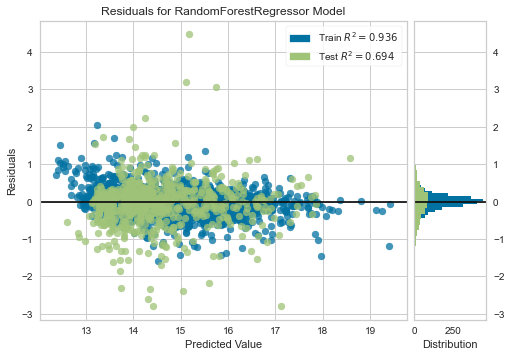

In [29]:
visualizer = ResidualsPlot(final_model_energy)
visualizer.fit(np.array(X_train), np.array(y_train).reshape(2680,))
visualizer.score(np.array(X_test), np.array(y_test).reshape(670,))
visualizer.show();

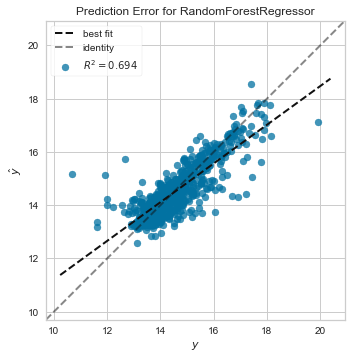

In [30]:
visualizer = prediction_error(final_model_energy, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test));


In [31]:
feature_importance = grid_search.best_estimator_.feature_importances_


In [32]:
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder[1].categories_)
cat_one = list(cat_one_hot_attribs[0])
cat_two = list(cat_one_hot_attribs[1])
cat_three = list(cat_one_hot_attribs[2])
cat_four = list(cat_one_hot_attribs[3])
attributes = num_var + cat_one + cat_two + cat_three + cat_four
importances = pd.DataFrame(feature_importance.round(4), attributes).reset_index()
importances.columns = ["Features", "Features Importances"]

In [33]:
importances.sort_values("Features Importances", ascending=False)


,Features,Features Importances
70,3,0.7283
69,2,0.0582
71,4,0.0370
6,High-Rise Multifamily,0.0218
16,Residence Hall,0.0217
...,...,...
46,Other,0.0000
45,Office,0.0000
42,Multifamily Housing,0.0000
35,Food Service,0.0000


In [34]:
data["PrimaryPropertyType"].values

array(['Hotel', 'Hotel', 'Hotel', ..., 'Other', 'Mixed Use Property',
       'Mixed Use Property'], dtype=object)

In [35]:
data["SecondLargestPropertyUseType"].values

array(['None', 'Parking', 'Parking', ...,
       'Fitness Center/Health Club/Gym', 'Fitness Center/Health Club/Gym',
       'Fitness Center/Health Club/Gym'], dtype=object)

In [36]:
#Pipeline pour estimer la conso d'énergie

full_pipeline_energy = Pipeline([
    ("preprocessing", preprocessor),
    ("model", final_model_energy)
])

In [37]:
# Même travail pour estimer l'émission de CO2 (avec prise en compte de l'ESS)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data["PrimaryPropertyType"])

y_train = train_set[["TotalGHGEmissions_log"]]
y_test = test_set[["TotalGHGEmissions_log"]]
X_train = train_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log", "TotalGHGEmissions", "TotalGHGEmissions_log", "YearBuilt", "Neighborhood", "Latitude", "Longitude"], axis=1)
X_test = test_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log", "TotalGHGEmissions", "TotalGHGEmissions_log", "YearBuilt","Neighborhood", "Latitude", "Longitude"], axis=1)

In [38]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, cat_var),
    ('num', num_pipe, num_var)
])

In [39]:
X_train = preprocessor.fit_transform(X_train)

In [40]:
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train, y_train)

DummyRegressor(strategy='median')

In [41]:
X_test = preprocessor.transform(X_test)
y_pred = dummy_reg.predict(X_test)
regression_metrics(np.array(y_test), y_pred)

MAE:  1.2192
MSE:  2.22084
RMSE:  1.490247797661441
RMPSE:  2.93
MAPE:  28.94291
R²:  -0.0006


In [42]:
model = [dummy_reg, lin_reg, ridge, lasso, dt_reg, svm_reg, ridge_kernel, adaboost, bagging, rdmforest]
dict_model = {}

for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    dict_model[model] = (mae.round(3), mse.round(3), rmse.round(3), r_score)

eval_model = pd.DataFrame(dict_model, index=["MAE", "MSE", "RMSE", "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "DecisionTree", "SVM", "Ridge Kernel",
                      "AdaBoost", "Bagging", "Random Forest"]

eval_model

,Dummy Regressor,Linear Regression,Ridge,Lasso,DecisionTree,SVM,Ridge Kernel,AdaBoost,Bagging,Random Forest
MAE,1.219,7.840863e+08,0.927,1.219,0.991,0.750,0.929,0.950,0.802,0.768
MSE,2.221,1.373034e+20,1.367,2.220,1.839,1.016,1.369,1.300,1.111,1.023
RMSE,1.490,1.171765e+10,1.169,1.490,1.356,1.008,1.170,1.140,1.054,1.011
R²,-0.001,-6.186217e+19,0.384,-0.000,0.172,0.542,0.383,0.414,0.499,0.539


In [43]:
params = [{"bootstrap":[True],
           "max_depth" : [80, 90, 100, 110],
           "max_features" : ["auto"],
           "min_samples_leaf" : [2, 3, 4],
           "min_samples_split" : [2, 3, 4],
           "n_estimators" : [550, 600, 650]
}]

grid_search = GridSearchCV(forest_reg, params, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                          'max_features': ['auto'],
                          'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [550, 600, 650]}],
             scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [45]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, min_samples_leaf=4, n_estimators=600,
                      n_jobs=-1, random_state=42)

In [46]:
final_model_c02 = grid_search.best_estimator_

In [47]:
final_predictions_c02 = final_model_c02.predict(X_test)

In [48]:
regression_metrics(np.array(y_test), final_predictions_c02)

MAE:  0.76211
MSE:  1.00564
RMSE:  1.0028145880698562
RMPSE:  3.07
MAPE:  34.24241
R²:  0.54691


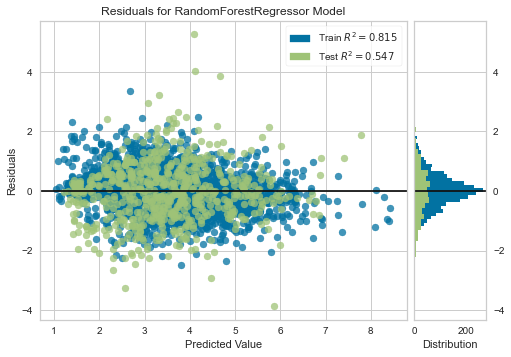

In [49]:
visualizer = ResidualsPlot(final_model_c02)
visualizer.fit(np.array(X_train), np.array(y_train).reshape(2680,))
visualizer.score(np.array(X_test), np.array(y_test).reshape(670,))
visualizer.show();

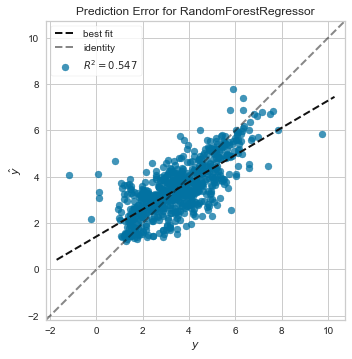

In [50]:
visualizer = prediction_error(final_model_c02, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test));

In [51]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [53]:
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder[1].categories_)
cat_one = list(cat_one_hot_attribs[0])
cat_two = list(cat_one_hot_attribs[1])
cat_three = list(cat_one_hot_attribs[2])
cat_four = list(cat_one_hot_attribs[3])
attributes = num_var + cat_one + cat_two + cat_three + cat_four
importances = pd.DataFrame(feature_importance.round(4), attributes).reset_index()
importances.columns = ["Features", "Features Importances"]

In [54]:
importances.sort_values("Features Importances", ascending=False).head(10)

,Features,Features Importances
70,3,0.5573
69,2,0.1490
6,High-Rise Multifamily,0.0733
71,4,0.0503
72,No,0.0349
16,Residence Hall,0.0211
7,Hospital,0.0123
9,K-12 School,0.0112
10,Laboratory,0.0103
50,Other - Public Services,0.0080


In [55]:
full_pipeline_c02 = Pipeline([
    ("preprocessing", preprocessor),
    ("model", final_model_c02)
])

In [56]:
# Même travail pour estimer l'émission de CO2 (sans prise en compte de l'ESS)

In [57]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data["PrimaryPropertyType"])

y_train = train_set[["TotalGHGEmissions_log"]]
y_test = test_set[["TotalGHGEmissions_log"]]
X_train = train_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log","ENERGYSTARScore", "TotalGHGEmissions", "TotalGHGEmissions_log", "YearBuilt", "Neighborhood", "Latitude", "Longitude"], axis=1)
X_test = test_set.drop(["SiteEnergyUse(kBtu)", "SiteEnergyUse(kBtu)_log", "TotalGHGEmissions","ENERGYSTARScore", "TotalGHGEmissions_log", "YearBuilt","Neighborhood", "Latitude", "Longitude"], axis=1)

In [58]:
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median", fill_value="missing")),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
    ('cat', cat_pipe, cat_var),
    ('num', num_pipe, num_var)
])

In [59]:
X_train = preprocessor.fit_transform(X_train)

In [ ]:
mean_absolute_percentage_error = lambda y1, y2 : np.mean(np.abs(y1-y2)/(np.maximum(np.abs(y1), np.abs(y2)))*100)

In [ ]:
def rmpse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))

    return loss

In [ ]:
def regression_metrics(y_test, y_pred):
    """Function which contains differents metrics about regression
    Input: y_test, prediction
    
    Output: MAE, MSE, RMSE, MAPE & R² score  
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmpse_cal = rmpse(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("MAE: ",mae.round(5))
    print("MSE: ", mse.round(5))
    print("RMSE: ", rmse)
    print("RMPSE: ", rmpse_cal.round(3))
    print("MAPE: ", mape.round(5))
    print("R²: ", r_score.round(5))

In [ ]:
dummy_reg = DummyRegressor(strategy="median")
dummy_reg.fit(X_train, y_train)

In [ ]:
X_test = preprocessor.transform(X_test)
y_pred = dummy_reg.predict(X_test)
regression_metrics(np.array(y_test), y_pred)

In [ ]:
dummy_reg = DummyRegressor(strategy="median")
lin_reg = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
dt_reg =  DecisionTreeRegressor(random_state=42)
svm_reg = SVR()
ridge_kernel = KernelRidge()
adaboost = AdaBoostRegressor(random_state=42)
bagging = BaggingRegressor(random_state=42)
rdmforest = RandomForestRegressor(random_state=42)

In [ ]:
model_list = [dummy_reg, lin_reg, ridge, lasso, dt_reg, svm_reg, ridge_kernel, adaboost, bagging, rdmforest]
dict_model = {}

for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(3)
    dict_model[model] = (mae.round(3), mse.round(3), rmse.round(3), r_score)

eval_model = pd.DataFrame(dict_model, index=["MAE", "MSE", "RMSE", "R²"])
eval_model.columns = ["Dummy Regressor", "Linear Regression", "Ridge", "Lasso", "DecisionTree", "SVM", "Ridge Kernel",
                      "AdaBoost", "Bagging", "Random Forest"]

eval_model

In [ ]:
X= X_train
Y= y_train
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
for maudail in model_list : 
    score=cross_val_score(maudail,X,Y,cv=kf)
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    print(maudail)

In [ ]:
grad_reg = GradientBoostingRegressor(random_state=42)

In [ ]:
forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
params = [{"bootstrap":[True],
           "max_depth" : [80, 90, 100, 110],
           "max_features" : ["auto"],
           "min_samples_leaf" : [2, 3, 4],
           "min_samples_split" : [2, 3, 4],
           "n_estimators" : [550, 600, 650]
}]

grid_search = GridSearchCV(forest_reg, params, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
final_model_c02noESS = grid_search.best_estimator_

In [ ]:
final_predictions_c02noESS = final_model_c02noESS.predict(X_test)

In [ ]:
regression_metrics(np.array(y_test), final_predictions_c02noESS)

In [ ]:
visualizer = ResidualsPlot(final_model_c02noESS)
visualizer.fit(np.array(X_train), np.array(y_train).reshape(2680,))
visualizer.score(np.array(X_test), np.array(y_test).reshape(670,))
visualizer.show();

In [ ]:
visualizer = prediction_error(final_model_c02noESS, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test));


In [ ]:
feature_importance = grid_search.best_estimator_.feature_importances_


In [ ]:
cat_encoder = preprocessor.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder[1].categories_)
cat_one = list(cat_one_hot_attribs[0])
cat_two = list(cat_one_hot_attribs[1])
cat_three = list(cat_one_hot_attribs[2])
cat_four = list(cat_one_hot_attribs[3])
attributes = num_var + cat_one + cat_two + cat_three + cat_four
importances = pd.DataFrame(feature_importance.round(4), attributes).reset_index()
importances.columns = ["Features", "Features Importances"]

In [ ]:
importances.sort_values("Features Importances", ascending=False)

In [ ]:
full_pipeline_c02noESS = Pipeline([
    ("preprocessing", preprocessor),
    ("model", final_model_c02noESS)
])